In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree # Для применения метода решающих деревьев
%matplotlib inline

# ДЛя изуализация дерева решений

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;</style>"
HTML(style)

# Для ограничения глубины обучения дерева
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # Кроссвалидации при обучении
from sklearn.model_selection import GridSearchCV # Для подбора лучших параметров для обучения решающего дерева
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score # Для расчета метрик качества модели
from sklearn.metrics import roc_curve, auc # Для графика рок-кривой

In [ ]:
# Начнём с простого - создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и 
#сохраните его в переменную dt.

# У дерева должны быть следующие параметры:
# максимальная глубина - 5 уровней
# минимальное число образцов в вершине для разделения - 5

dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=5)

In [5]:
# Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание 
# сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите 
# дерево решений на этих данных, используйте entropy в качестве критерия.
# Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.


df_bolen = pd.read_csv('C:\\Users\\Ильнар\\Data science\\train_data_tree.csv')

df_bolen

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [9]:
X_bol = df_bolen.drop(['num'],axis=1)
y_bol = df_bolen.num
clf = tree.DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

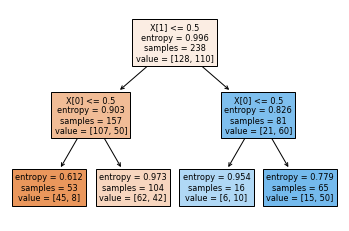

In [16]:
clf.fit(X_bol,y_bol)
tree.plot_tree(clf, filled=True)

In [18]:
# IG = entropy[0] - (samples[1]/samples[0]*entropy[1] + samples[2]/samples[0]*entropy[2])
IG = 0.996 - ((157/238)*0.903 + (81/238)*0.826)
IG

0.11920588235294116

In [22]:
# Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем 
# примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся 
# данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
# Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, 
# к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

from sklearn.datasets import load_iris
 
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
X_ir = iris.data
X_ir
y_ir = iris.target

In [28]:
X_train_ir,X_test_ir,y_train_ir,y_test_ir = train_test_split(X_ir,y_ir,train_size=0.75)
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train_ir,y_train_ir)

DecisionTreeClassifier()

In [33]:
predicted = clf_dt.predict(X_test_ir)
predicted

0.9210526315789473

In [ ]:
# Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [35]:
iris = load_iris()
X_ir = iris.data
y_ir = iris.target
parametrs = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
clf  = tree.DecisionTreeClassifier()

In [38]:
search = GridSearchCV(clf,parametrs,cv=5)
search.fit(X_ir,y_ir)
best_tree = search.best_estimator_

In [ ]:
# Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
#Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [41]:
iris = load_iris()
X_ir = iris.data
y_ir = iris.target
parametrs = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
clf  = tree.DecisionTreeClassifier()
search = RandomizedSearchCV(clf,parametrs,cv=5)
search.fit(X_ir,y_ir)
best_tree = search.best_estimator_

In [48]:
# Построение матрицы
X_train,X_test,y_train,y_test = train_test_split(X_ir,y_ir,train_size=0.75)
from sklearn.metrics import confusion_matrix
parametrs = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
clf  = tree.DecisionTreeClassifier()
search = RandomizedSearchCV(clf,parametrs,cv=5)
search.fit(X_train,y_train)
best_tree = search.best_estimator_
predict = best_tree.predict(X_test)
confusion_matrix(y_test,predict)

array([[ 6,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 15]], dtype=int64)